# Exercise - Regression - Support Vector Regressor Experiments

Let's take the data from: https://www.kaggle.com/datasets/mariospirito/position-salariescsv

We've a few rows with the following information:
* Position: Job-title
* Level: Level based in job skills
* Salary

With this data let's make two experiments:
1. Take the data and do a basic EDA, make an SVR, plot the results and get the R2 and MSE metrics
2. Do again the same process in first step but first Normalize the data, what happend with results ? (Explore the inversion of your transformation to get again the original data)

## SOLUTION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


<AxesSubplot:>

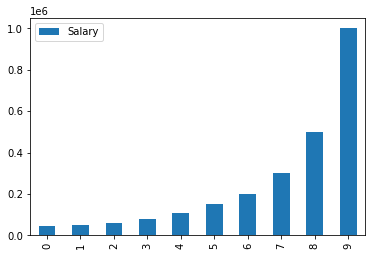

In [3]:
df[["Position", "Salary"]].plot(kind="bar")

In [4]:
# If we assign a number to each Position we'll have
#  a vector from 1 to 10 equals to Level column
#  so, we don't need Position column
X = df.Level.values.reshape(-1, 1)
y = df.Salary.values.reshape(-1, 1)

In [5]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf').fit(X, y)

C:\Users\JMMoreno\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


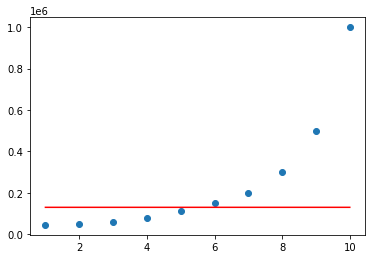

In [6]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color='r')
plt.show()

In [7]:
print("R2 {}".format(r2_score(X, y)))
print("MSE {}".format(mean_squared_error(X, y)))

R2 -17322232852.151516
MSE 142908421038.5


The model is very bad because we did not scale the input. Most of the models like LinearRegression automatically scale the data, but perhaps the SVR model is not widely used, it doesn't scale the data by itself. Hence we have to manually scale the data

In [8]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [9]:
regressor = SVR(kernel='rbf').fit(X, y)

C:\Users\JMMoreno\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


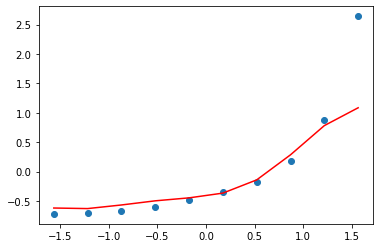

In [10]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color='r')
plt.show()

The prediction of the last point is a bit off because it is treated as an outlier by the default parameters set by SVR.

In [11]:
print("R2 {}".format(r2_score(X, y)))
print("MSE {}".format(mean_squared_error(X, y)))

R2 0.6358988149552398
MSE 0.3641011850447602


How we can go back to our original data?

In [12]:
sc_y.inverse_transform(y)

array([[  45000.],
       [  50000.],
       [  60000.],
       [  80000.],
       [ 110000.],
       [ 150000.],
       [ 200000.],
       [ 300000.],
       [ 500000.],
       [1000000.]])

Now in order to predict a particular input, we first scale it, predict it, and inverse scale it to obtain the actual value

In [13]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))).reshape(-1, 1))
y_pred

array([[170370.0204065]])